# 用于执行AI解释相关概念创建的代码

## defaultdict和Counter

In [9]:
from collections import defaultdict

# 创建一个默认值为列表的 defaultdict
dd = defaultdict(list)

# 即使键不存在，也会自动创建空列表
dd['fruits'].append('apple')
dd['fruits'].append('banana')
dd['vegetables'].append('carrot')

print(dd)
# 输出: defaultdict(<class 'list'>, {'fruits': ['apple', 'banana'], 'vegetables': ['carrot']})

print(dd['fruits'])  # ['apple', 'banana']
print(dd['meat'])    # [] (自动创建空列表)

defaultdict(<class 'list'>, {'fruits': ['apple', 'banana'], 'vegetables': ['carrot']})
['apple', 'banana']
[]


In [2]:
from collections import defaultdict

# 创建一个默认值为 0 的 defaultdict
word_count = defaultdict(int)

text = "apple banana apple orange banana apple"

for word in text.split():
    word_count[word] += 1

print(word_count)
# 输出: defaultdict(<class 'int'>, {'apple': 3, 'banana': 2, 'orange': 1})

defaultdict(<class 'int'>, {'apple': 3, 'banana': 2, 'orange': 1})


In [3]:
from collections import defaultdict

def default_value():
    return "Unknown"

dd = defaultdict(default_value)
dd['name'] = 'Alice'
print(dd['name'])    # Alice
print(dd['age'])     # Unknown (自动使用自定义默认值)

Alice
Unknown


In [4]:
from collections import Counter

# 从列表创建 Counter
fruits = ['apple', 'banana', 'apple', 'orange', 'banana', 'apple']
fruit_counter = Counter(fruits)

print(fruit_counter)
# 输出: Counter({'apple': 3, 'banana': 2, 'orange': 1})

# 访问计数
print(fruit_counter['apple'])   # 3
print(fruit_counter['pear'])    # 0 (不存在的键返回 0)

Counter({'apple': 3, 'banana': 2, 'orange': 1})
3
0


In [5]:
from collections import Counter

text = "mississippi"
char_counter = Counter(text)

print(char_counter)
# 输出: Counter({'i': 4, 's': 4, 'p': 2, 'm': 1})

Counter({'i': 4, 's': 4, 'p': 2, 'm': 1})


In [6]:
from collections import Counter

fruits = ['apple', 'banana', 'apple', 'orange', 'banana', 'apple']
fruit_counter = Counter(fruits)

# 获取出现次数最多的前 2 个元素
print(fruit_counter.most_common(2))
# 输出: [('apple', 3), ('banana', 2)]

# 不指定参数则返回所有元素
print(fruit_counter.most_common())
# 输出: [('apple', 3), ('banana', 2), ('orange', 1)]

[('apple', 3), ('banana', 2)]
[('apple', 3), ('banana', 2), ('orange', 1)]


In [7]:
from collections import Counter

c1 = Counter({'a': 3, 'b': 2, 'c': 1})
c2 = Counter({'a': 1, 'b': 2, 'd': 3})

# 加法
print(c1 + c2)
# 输出: Counter({'a': 4, 'b': 4, 'd': 3, 'c': 1})

# 减法
print(c1 - c2)
# 输出: Counter({'a': 2, 'c': 1})

# 交集（取最小值）
print(c1 & c2)
# 输出: Counter({'b': 2, 'a': 1})

# 并集（取最大值）
print(c1 | c2)
# 输出: Counter({'a': 3, 'd': 3, 'b': 2, 'c': 1})

Counter({'a': 4, 'b': 4, 'd': 3, 'c': 1})
Counter({'a': 2, 'c': 1})
Counter({'b': 2, 'a': 1})
Counter({'a': 3, 'd': 3, 'b': 2, 'c': 1})


In [8]:
from collections import Counter

# 创建空的 Counter
c = Counter()

# 使用 update 方法添加元素
c.update('abcdeab')
print(c)  # Counter({'a': 2, 'b': 2, 'c': 1, 'd': 1, 'e': 1})

# 再次更新
c.update({'a': 3, 'f': 2})
print(c)  # Counter({'a': 5, 'b': 2, 'c': 1, 'd': 1, 'e': 1, 'f': 2})

Counter({'a': 2, 'b': 2, 'c': 1, 'd': 1, 'e': 1})
Counter({'a': 5, 'b': 2, 'f': 2, 'c': 1, 'd': 1, 'e': 1})


## 库jieba

In [11]:
import jieba

text = "我来到北京清华大学"
result = jieba.cut(text, cut_all=False)
print("精确模式: " + "/".join(result))
# 输出: 我/来到/北京/清华大学

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 0.824 seconds.
Prefix dict has been built successfully.


精确模式: 我/来到/北京/清华大学


In [12]:
result = jieba.cut(text, cut_all=True)
print("全模式: " + "/".join(result))
# 输出: 我/来到/北京/清华/清华大学/华大/大学

全模式: 我/来到/北京/清华/清华大学/华大/大学


In [13]:
result = jieba.cut_for_search(text)
print("搜索引擎模式: " + "/".join(result))
# 输出: 我/来到/北京/清华/华大/大学/清华大学

搜索引擎模式: 我/来到/北京/清华/华大/大学/清华大学


In [15]:
import jieba.analyse

text = "机器学习是人工智能的重要分支，深度学习是机器学习的一个子领域"

# TF-IDF 关键词提取
keywords = jieba.analyse.extract_tags(text, topK=5, withWeight=True)
print("TF-IDF关键词:")
for keyword, weight in keywords:
    print(f"{keyword}: {weight:.4f}")

# TextRank 关键词提取
keywords = jieba.analyse.textrank(text, topK=5, withWeight=True)
print("\nTextRank关键词:")
for keyword, weight in keywords:
    print(f"{keyword}: {weight:.4f}")

TF-IDF关键词:
学习: 1.5756
机器: 1.2076
人工智能: 0.8598
分支: 0.6351
深度: 0.6325

TextRank关键词:
学习: 1.0000
机器: 0.5045
深度: 0.4171
分支: 0.3302
人工智能: 0.3262


In [14]:
import jieba
import jieba.analyse
import jieba.posseg as pseg

def text_processing_pipeline(text):
    """文本处理流水线"""
    
    # 1. 分词
    words = jieba.lcut(text)
    print(f"分词结果: {words}")
    
    # 2. 关键词提取
    keywords = jieba.analyse.extract_tags(text, topK=3)
    print(f"关键词: {keywords}")
    
    # 3. 词性标注
    pos_words = [(word, flag) for word, flag in pseg.cut(text)]
    print(f"词性标注: {pos_words}")
    
    # 4. 过滤停用词（简单示例）
    stop_words = {'的', '了', '在', '是', '我', '有', '和', '就'}
    filtered_words = [word for word in words if word not in stop_words and len(word) > 1]
    print(f"过滤后: {filtered_words}")
    
    return filtered_words

# 测试
text = "今天天气很好，我去了北京的故宫博物院参观"
text_processing_pipeline(text)

分词结果: ['今天天气', '很', '好', '，', '我', '去', '了', '北京', '的', '故宫博物院', '参观']
关键词: ['今天天气', '故宫博物院', '参观']
词性标注: [('今天天气', 'i'), ('很', 'd'), ('好', 'a'), ('，', 'x'), ('我', 'r'), ('去', 'v'), ('了', 'ul'), ('北京', 'ns'), ('的', 'uj'), ('故宫博物院', 'ns'), ('参观', 'n')]
过滤后: ['今天天气', '北京', '故宫博物院', '参观']


['今天天气', '北京', '故宫博物院', '参观']

In [17]:
import jieba
from collections import Counter

def chinese_ngram_analysis(texts, n=2):
    """中文文本的 N-Gram 分析"""
    
    # 使用 jieba 分词
    all_tokens = []
    for text in texts:
        tokens = jieba.lcut(text)
        all_tokens.extend(tokens)
    
    # 生成 N-Gram
    ngrams = []
    for i in range(len(all_tokens) - n + 1):
        ngram = tuple(all_tokens[i:i+n])
        ngrams.append(ngram)
    
    # 统计频率
    ngram_counter = Counter(ngrams)
    
    return ngram_counter.most_common(10)

# 测试数据
chinese_corpus = [
    "我喜欢吃苹果",
    "我喜欢编程",
    "机器学习很有趣",
    "深度学习是人工智能的一部分"
]

# 分析 Bigram
bigrams = chinese_ngram_analysis(chinese_corpus, 2)
print("最常见的 Bigram:")
for ngram, count in bigrams:
    print(f"{' '.join(ngram)}: {count}")

最常见的 Bigram:
我 喜欢: 2
喜欢 吃: 1
吃 苹果: 1
苹果 我: 1
喜欢 编程: 1
编程 机器: 1
机器 学习: 1
学习 很: 1
很 有趣: 1
有趣 深度: 1


In [18]:
import jieba
from collections import defaultdict, Counter

def improved_count_ngrams(corpus, n, use_jieba=True):
    """改进的 N-Gram 计数函数，支持 jieba 分词"""
    ngrams_count = defaultdict(Counter)
    
    for text in corpus:
        if use_jieba:
            # 使用 jieba 分词
            tokens = jieba.lcut(text)
        else:
            # 使用字符级分词
            tokens = [char for char in text]
        
        for i in range(len(tokens) - n + 1):
            ngram = tuple(tokens[i:i+n])
            prefix = ngram[:-1]
            token = ngram[-1]
            ngrams_count[prefix][token] += 1
    
    return ngrams_count

# 测试
corpus = ['我喜欢吃苹果', '我喜欢编程', '机器学习很有趣']
print("使用 jieba 分词的 Bigram:")
bigram_counts = improved_count_ngrams(corpus, 2, use_jieba=True)
for prefix, counts in bigram_counts.items():
    print(f"{'/'.join(prefix)}: {dict(counts)}")

使用 jieba 分词的 Bigram:
我: {'喜欢': 2}
喜欢: {'吃': 1, '编程': 1}
吃: {'苹果': 1}
机器: {'学习': 1}
学习: {'很': 1}
很: {'有趣': 1}


## 余弦相似度

In [21]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 定义两个向量
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

# 手动计算余弦相似度
dot_product = np.dot(A, B)  # 1*4 + 2*5 + 3*6 = 4 + 10 + 18 = 32
norm_A = np.linalg.norm(A)  # √(1²+2²+3²) = √14 ≈ 3.742
norm_B = np.linalg.norm(B)  # √(4²+5²+6²) = √77 ≈ 8.775
cos_sim = dot_product / (norm_A * norm_B)  # 32 / (3.742*8.775) ≈ 0.974

print(f"余弦相似度: {cos_sim:.3f}")

# 使用 sklearn 计算
cos_sim_sklearn = cosine_similarity([A], [B])[0][0]
print(f"sklearn 计算结果: {cos_sim_sklearn:.3f}")

余弦相似度: 0.975
sklearn 计算结果: 0.975


### 向量距离度量

In [24]:
def euclidean_distance(A, B):
    return np.sqrt(np.sum((A - B) ** 2))

# 示例
A = np.array([1, 2])
B = np.array([4, 6])
print(f"欧氏距离: {euclidean_distance(A, B):.2f}")  # √(3²+4²) = 5

欧氏距离: 5.00


In [25]:
def manhattan_distance(A, B):
    return np.sum(np.abs(A - B))

# 示例
print(f"曼哈顿距离: {manhattan_distance(A, B)}")  # |3|+|4| = 7

曼哈顿距离: 7


In [26]:
def chebyshev_distance(A, B):
    return np.max(np.abs(A - B))

# 示例
print(f"切比雪夫距离: {chebyshev_distance(A, B)}")  # max(|3|,|4|) = 4

切比雪夫距离: 4


In [27]:
import matplotlib.pyplot as plt

# 定义测试向量
vectors = {
    '完全相似': (np.array([3, 4]), np.array([6, 8])),      # 同方向，不同大小
    '正交': (np.array([3, 0]), np.array([0, 4])),         # 90度夹角
    '相反': (np.array([3, 4]), np.array([-3, -4])),       # 180度夹角
    '一般情况': (np.array([1, 2]), np.array([4, 2]))       # 45度左右夹角
}

# 计算各种距离
results = {}
for name, (A, B) in vectors.items():
    cos_sim = cosine_similarity([A], [B])[0][0]
    euc_dist = euclidean_distance(A, B)
    man_dist = manhattan_distance(A, B)
    che_dist = chebyshev_distance(A, B)
    
    results[name] = {
        '余弦相似度': cos_sim,
        '欧氏距离': euc_dist,
        '曼哈顿距离': man_dist,
        '切比雪夫距离': che_dist
    }

# 显示结果
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.3f}")


完全相似:
  余弦相似度: 1.000
  欧氏距离: 5.000
  曼哈顿距离: 7.000
  切比雪夫距离: 4.000

正交:
  余弦相似度: 0.000
  欧氏距离: 5.000
  曼哈顿距离: 7.000
  切比雪夫距离: 4.000

相反:
  余弦相似度: -1.000
  欧氏距离: 10.000
  曼哈顿距离: 14.000
  切比雪夫距离: 8.000

一般情况:
  余弦相似度: 0.800
  欧氏距离: 3.000
  曼哈顿距离: 3.000
  切比雪夫距离: 3.000


In [28]:
# 案例：文本向量化后的比较
doc1 = np.array([10, 20, 5])    # 文档1的词频
doc2 = np.array([20, 40, 10])   # 文档2的词频（两倍于doc1）
doc3 = np.array([5, 10, 20])    # 文档3的词频（不同分布）

print("文档相似度分析:")
print(f"doc1 vs doc2 - 余弦相似度: {cosine_similarity([doc1], [doc2])[0][0]:.3f}")
print(f"doc1 vs doc2 - 欧氏距离: {euclidean_distance(doc1, doc2):.3f}")
print(f"doc1 vs doc3 - 余弦相似度: {cosine_similarity([doc1], [doc3])[0][0]:.3f}")
print(f"doc1 vs doc3 - 欧氏距离: {euclidean_distance(doc1, doc3):.3f}")

文档相似度分析:
doc1 vs doc2 - 余弦相似度: 1.000
doc1 vs doc2 - 欧氏距离: 22.913
doc1 vs doc3 - 余弦相似度: 0.667
doc1 vs doc3 - 欧氏距离: 18.708


In [29]:
# 归一化对欧氏距离的影响
def normalized_euclidean(A, B):
    A_norm = A / np.linalg.norm(A)
    B_norm = B / np.linalg.norm(B)
    return euclidean_distance(A_norm, B_norm)

# 比较
A = np.array([10, 20])
B = np.array([20, 40])

print(f"原始欧氏距离: {euclidean_distance(A, B):.3f}")
print(f"归一化欧氏距离: {normalized_euclidean(A, B):.3f}")
print(f"余弦距离: {1 - cosine_similarity([A], [B])[0][0]:.3f}")

原始欧氏距离: 22.361
归一化欧氏距离: 0.000
余弦距离: 0.000


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = [
    "我喜欢机器学习",
    "我爱深度学习", 
    "今天天气很好",
    "机器学习很有趣"
]

# TF-IDF 向量化
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# 计算余弦相似度矩阵
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

print("文档间余弦相似度矩阵:")
print(cosine_sim_matrix)

文档间余弦相似度矩阵:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [31]:
def recommend_similar_items(target_vector, item_vectors, top_k=3):
    """
    基于余弦相似度的推荐
    """
    similarities = []
    for i, vector in enumerate(item_vectors):
        sim = cosine_similarity([target_vector], [vector])[0][0]
        similarities.append((i, sim))
    
    # 按相似度排序
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_k]

# 示例使用
user_profile = np.array([0.8, 0.2, 0.5, 0.1])
items = [
    np.array([0.7, 0.3, 0.6, 0.2]),
    np.array([0.1, 0.9, 0.2, 0.8]), 
    np.array([0.8, 0.1, 0.5, 0.1]),
    np.array([0.3, 0.7, 0.1, 0.9])
]

recommendations = recommend_similar_items(user_profile, items)
print("推荐结果:", recommendations)

推荐结果: [(2, 0.9947253925078432), (0, 0.9793792286287206), (3, 0.45328922844036434)]


## 高维稀疏向量 vs 低维密集向量

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# 假设词汇表有5个词（简化示例）
corpus = [
    "我喜欢机器学习",
    "我爱深度学习", 
    "今天天气很好"
]

# 创建高维稀疏向量
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

print("词汇表（特征维度）:", vectorizer.get_feature_names_out())
print("向量维度:", X.shape)  # (3, 5) - 3个文档，5个特征维度
print("稀疏矩阵:\n", X.toarray())

词汇表（特征维度）: ['今天天气很好' '我喜欢机器学习' '我爱深度学习']
向量维度: (3, 3)
稀疏矩阵:
 [[0 1 0]
 [0 0 1]
 [1 0 0]]


In [33]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 模拟词嵌入向量（实际中通过Word2Vec等模型训练得到）
word_embeddings = {
    '国王':   [0.8, 0.2, 0.5],
    '王后':   [0.7, 0.3, 0.6], 
    '男人':   [0.6, 0.1, 0.4],
    '女人':   [0.5, 0.4, 0.5],
    '苹果':   [0.1, 0.9, 0.2],
    '香蕉':   [0.2, 0.8, 0.3],
}

# 查看向量特性
for word, embedding in word_embeddings.items():
    print(f"{word}: {embedding} (维度: {len(embedding)})")

国王: [0.8, 0.2, 0.5] (维度: 3)
王后: [0.7, 0.3, 0.6] (维度: 3)
男人: [0.6, 0.1, 0.4] (维度: 3)
女人: [0.5, 0.4, 0.5] (维度: 3)
苹果: [0.1, 0.9, 0.2] (维度: 3)
香蕉: [0.2, 0.8, 0.3] (维度: 3)


In [34]:
# 高维空间中的向量关系
def high_dimensional_issues():
    # 在10000维空间中，几乎所有向量都近似正交
    dimensions = 10000
    random_vectors = np.random.rand(100, dimensions)  # 100个随机向量
    
    similarities = []
    for i in range(100):
        for j in range(i+1, 100):
            sim = cosine_similarity([random_vectors[i]], [random_vectors[j]])[0][0]
            similarities.append(sim)
    
    avg_similarity = np.mean(similarities)
    print(f"高维随机向量平均相似度: {avg_similarity:.6f}")  # 接近0

high_dimensional_issues()

高维随机向量平均相似度: 0.750379


In [35]:
# 词向量的语义关系
def word_analogy():
    # 著名的词向量类比：国王 - 男人 + 女人 ≈ 王后
    king = np.array([0.8, 0.2, 0.5])
    man = np.array([0.6, 0.1, 0.4])
    woman = np.array([0.5, 0.4, 0.5])
    queen = np.array([0.7, 0.3, 0.6])
    
    # 计算类比结果
    analogy_result = king - man + woman
    actual_similarity = cosine_similarity([analogy_result], [queen])[0][0]
    
    print(f"类比结果与王后的相似度: {actual_similarity:.3f}")  # 应该很高

word_analogy()

类比结果与王后的相似度: 0.983


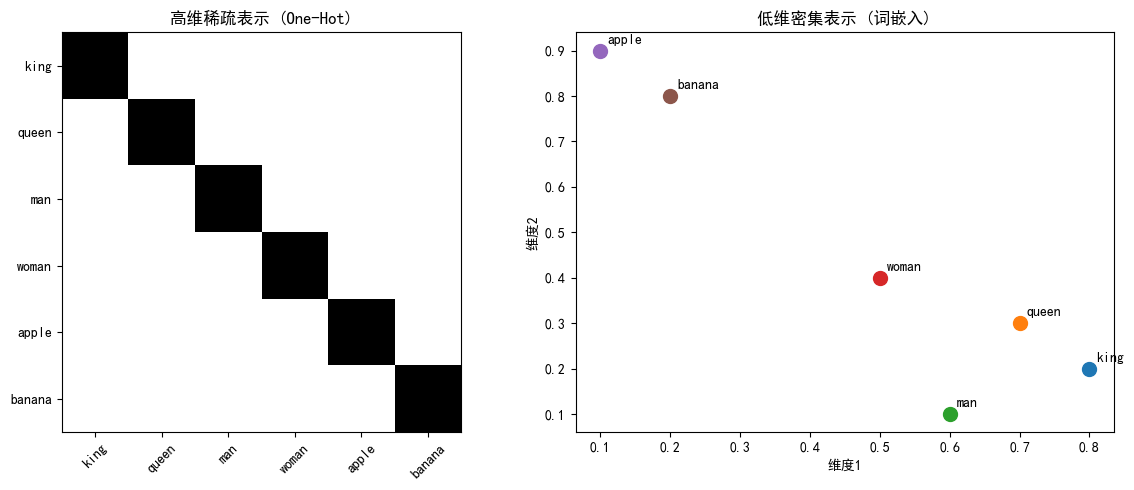

In [39]:
# 可视化两种表示的区别
def visualize_representations():
    # 创建示例数据
    words = ['king', 'queen', 'man', 'woman', 'apple', 'banana']
    
    # 高维稀疏表示（one-hot）
    sparse_vectors = np.eye(6)  # 6维单位矩阵
    
    # 低维密集表示（模拟词嵌入）
    dense_vectors = np.array([
        [0.8, 0.2],    # king
        [0.7, 0.3],    # queen  
        [0.6, 0.1],    # man
        [0.5, 0.4],    # woman
        [0.1, 0.9],    # apple
        [0.2, 0.8]     # banana
    ])

    plt.rcParams['font.family'] = ['SimHei'] #字体样式
    plt.rcParams['font.sans-serif'] = ['SimHei'] #无衬线字体样式
    plt.rcParams['axes.unicode_minus'] = False #正常显示负号

    # 绘图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # 稀疏表示热图
    im1 = ax1.imshow(sparse_vectors, cmap='binary')
    ax1.set_xticks(range(6))
    ax1.set_xticklabels(words, rotation=45)
    ax1.set_yticks(range(6))
    ax1.set_yticklabels(words)
    ax1.set_title('高维稀疏表示 (One-Hot)')
    
    # 密集表示散点图
    for i, word in enumerate(words):
        ax2.scatter(dense_vectors[i, 0], dense_vectors[i, 1], s=100)
        ax2.annotate(word, (dense_vectors[i, 0], dense_vectors[i, 1]), 
                    xytext=(5, 5), textcoords='offset points')
    ax2.set_title('低维密集表示 (词嵌入)')
    ax2.set_xlabel('维度1')
    ax2.set_ylabel('维度2')
    
    plt.tight_layout()
    plt.show()

visualize_representations()

## 特征

In [40]:
# 原始文本
documents = [
    "我喜欢机器学习",
    "深度学习很有趣",
    "自然语言处理很强大"
]

# 转换为数值特征
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
print("文本特征矩阵:")
print(X.toarray())
print("特征名称:", vectorizer.get_feature_names_out())

文本特征矩阵:
[[1 0 0]
 [0 1 0]
 [0 0 1]]
特征名称: ['我喜欢机器学习' '深度学习很有趣' '自然语言处理很强大']


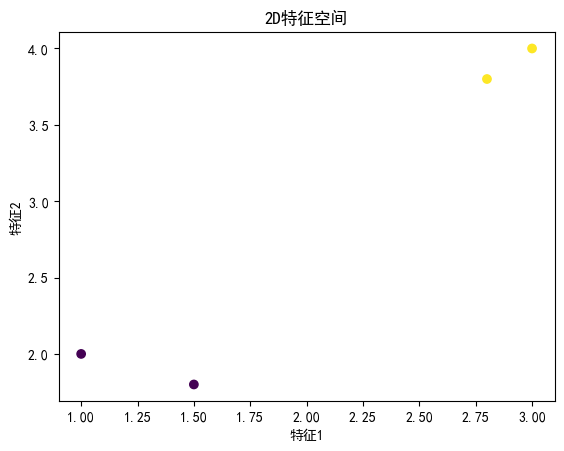

In [41]:
import matplotlib.pyplot as plt

# 2D特征空间示例
features_2d = np.array([
    [1.0, 2.0],  # 样本1
    [1.5, 1.8],  # 样本2  
    [3.0, 4.0],  # 样本3
    [2.8, 3.8]   # 样本4
])
labels = [0, 0, 1, 1]  # 类别

plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels)
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('2D特征空间')
plt.show()

## 特征和维度

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

# 文本特征 → 高维稀疏表示
documents = ["我喜欢机器学习", "深度学习很有趣"]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

print(f"原始文本数量: {len(documents)}")
print(f"特征维度: {X.shape[1]}")  # 词汇表大小决定的维度
print(f"特征名称: {vectorizer.get_feature_names_out()}")

原始文本数量: 2
特征维度: 2
特征名称: ['我喜欢机器学习' '深度学习很有趣']


In [45]:
def calculate_total_dimensions(feature_config):
    """
    计算特征工程后的总维度
    feature_config: 特征配置字典
    """
    total_dims = 0
    
    # 数值特征
    total_dims += feature_config.get('numeric_count', 0)
    
    # 类别特征（独热编码）
    for category_name, n_categories in feature_config.get('categorical', {}).items():
        total_dims += n_categories
    
    # 文本特征（词汇表大小）
    total_dims += feature_config.get('vocabulary_size', 0)
    
    # 交叉特征
    total_dims += feature_config.get('interaction_terms', 0)
    
    return total_dims

# 示例配置
config = {
    'numeric_count': 5,           # 5个数值特征
    'categorical': {               # 3个类别特征
        '颜色': 4,                 # 4种颜色 → 4维
        '城市': 10,                # 10个城市 → 10维  
        '品牌': 8                  # 8个品牌 → 8维
    },
    'vocabulary_size': 5000,       # 文本特征 → 5000维
    'interaction_terms': 15        # 15个交叉特征
}

total_dims = calculate_total_dimensions(config)
print(f"总维度数: {total_dims}")  # 5 + (4+10+8) + 5000 + 15 = 5042维

总维度数: 5042


C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


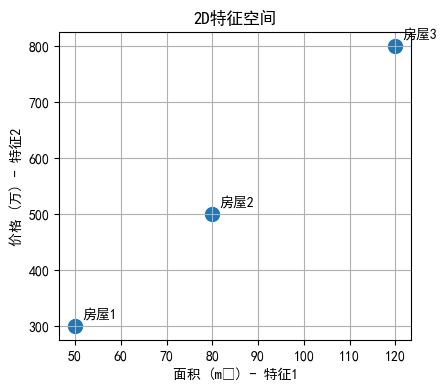

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# 2D特征空间示例
def plot_2d_feature_space():
    # 两个特征：面积和价格
    features_2d = np.array([
        [50, 300],   # 小户型
        [80, 500],   # 中户型  
        [120, 800],  # 大户型
    ])
    
    plt.figure(figsize=(10, 4))
    
    plt.subplot(121)
    plt.scatter(features_2d[:, 0], features_2d[:, 1], s=100)
    for i, (area, price) in enumerate(features_2d):
        plt.annotate(f'房屋{i+1}', (area, price), xytext=(5, 5), 
                    textcoords='offset points')
    plt.xlabel('面积 (m²) - 特征1')
    plt.ylabel('价格 (万) - 特征2')
    plt.title('2D特征空间')
    plt.grid(True)

plot_2d_feature_space()

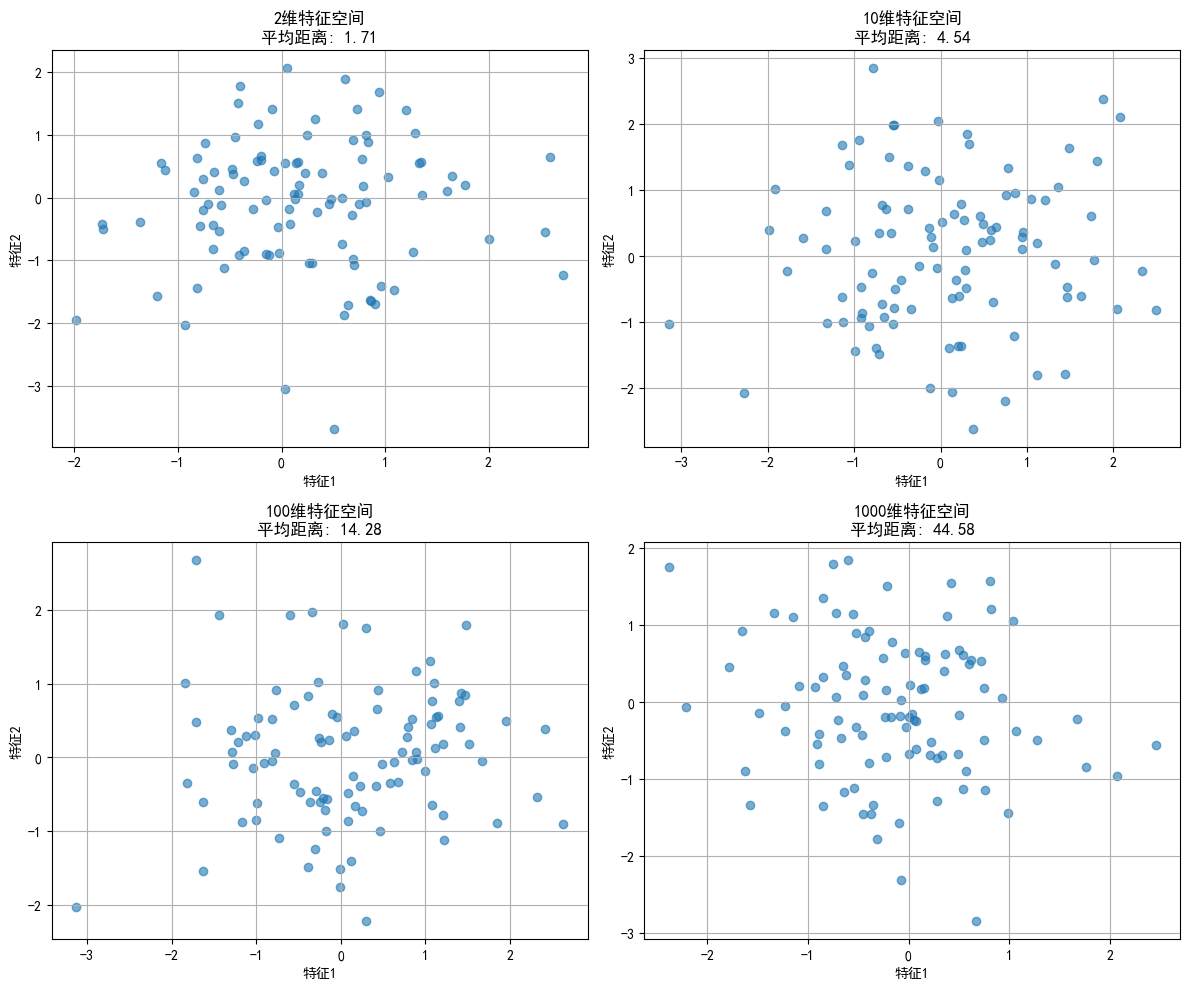

In [47]:
def demonstrate_high_dimensionality():
    """展示高维特征空间的特点"""
    
    # 模拟不同维度下的数据分布
    dimensions = [2, 10, 100, 1000]
    n_samples = 100
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()
    
    for idx, dim in enumerate(dimensions):
        # 生成高维随机数据
        data = np.random.randn(n_samples, dim)
        
        # 计算样本间的平均距离
        distances = []
        for i in range(n_samples):
            for j in range(i+1, n_samples):
                dist = np.linalg.norm(data[i] - data[j])
                distances.append(dist)
        
        avg_distance = np.mean(distances)
        
        # 可视化前两个维度（如果存在）
        if dim >= 2:
            axes[idx].scatter(data[:, 0], data[:, 1], alpha=0.6)
            axes[idx].set_xlabel('特征1')
            axes[idx].set_ylabel('特征2')
        
        axes[idx].set_title(f'{dim}维特征空间\n平均距离: {avg_distance:.2f}')
        axes[idx].grid(True)
    
    plt.tight_layout()
    plt.show()

demonstrate_high_dimensionality()

原始特征维度: 16
特征工程后维度: 142
实用维度: 128


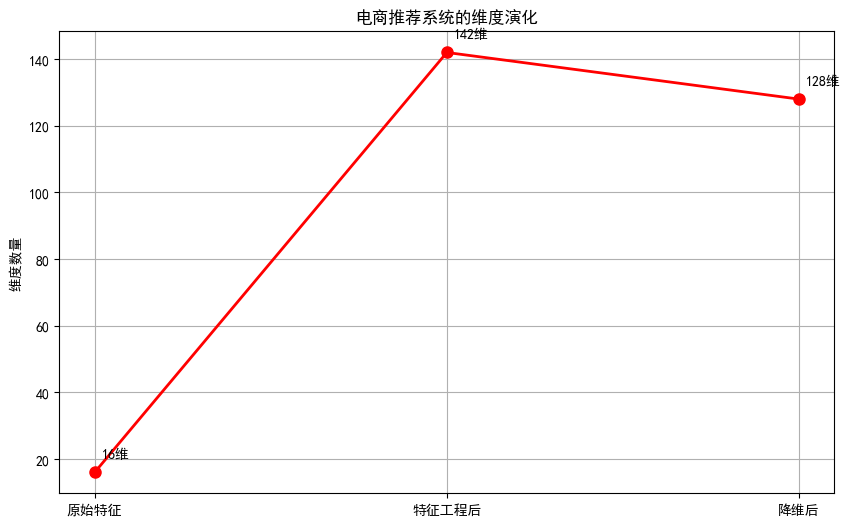

In [48]:
def ecommerce_feature_dimensionality():
    """电商推荐系统中的特征维度分析"""
    
    feature_categories = {
        '用户基础特征': ['年龄', '性别', '地域'],  # 3个特征
        '用户行为特征': ['点击率', '购买频率', '客单价', '最近活跃度'],  # 4个特征
        '商品特征': ['价格', '品类', '品牌', '评分', '销量'],  # 5个特征
        '上下文特征': ['时间', '设备', '季节', '促销活动'],  # 4个特征
    }
    
    # 计算原始维度
    original_dims = sum(len(features) for features in feature_categories.values())
    print(f"原始特征维度: {original_dims}")
    
    # 考虑特征工程后的维度
    engineered_dims = {
        '数值特征': 8,           # 直接使用的数值特征
        '类别特征(独热)': 50,    # 类别特征扩展
        '交叉特征': 20,          # 用户-商品交叉特征
        'Embedding特征': 64,     # 深度学习嵌入
    }
    
    total_engineered_dims = sum(engineered_dims.values())
    print(f"特征工程后维度: {total_engineered_dims}")
    
    # 降维后的实用维度
    practical_dims = 128  # 经过PCA或特征选择后的维度
    print(f"实用维度: {practical_dims}")
    
    # 可视化维度变化
    stages = ['原始特征', '特征工程后', '降维后']
    dimensions = [original_dims, total_engineered_dims, practical_dims]
    
    plt.figure(figsize=(10, 6))
    plt.plot(stages, dimensions, 'ro-', linewidth=2, markersize=8)
    plt.ylabel('维度数量')
    plt.title('电商推荐系统的维度演化')
    plt.grid(True)
    
    for i, (stage, dim) in enumerate(zip(stages, dimensions)):
        plt.annotate(f'{dim}维', (stage, dim), xytext=(5, 10), 
                    textcoords='offset points')
    
    plt.show()

ecommerce_feature_dimensionality()

In [49]:
class DimensionalityManager:
    """维度管理器"""
    
    def __init__(self, n_samples):
        self.n_samples = n_samples
    
    def recommended_max_dimensions(self):
        """根据样本数推荐最大维度"""
        # 经验法则：维度数不应超过样本数的1/10
        return self.n_samples // 10
    
    def calculate_density(self, n_features):
        """计算特征空间密度"""
        # 密度 = 样本数 / 2^维度数（简化计算）
        return self.n_samples / (2 ** min(n_features, 50))
    
    def suggest_strategy(self, current_dims):
        """根据当前维度推荐策略"""
        max_recommended = self.recommended_max_dimensions()
        density = self.calculate_density(current_dims)
        
        print(f"样本数量: {self.n_samples}")
        print(f"当前维度: {current_dims}")
        print(f"推荐最大维度: {max_recommended}")
        print(f"特征空间密度: {density:.6f}")
        
        if current_dims > max_recommended:
            print("🚨 建议：需要降维或特征选择")
            if density < 0.001:
                print("💡 具体方案：使用PCA或特征选择算法")
        else:
            print("✅ 维度在合理范围内")
        
        if density < 0.0001:
            print("⚠️  警告：特征空间过于稀疏，考虑收集更多数据")

# 使用示例
manager = DimensionalityManager(n_samples=1000)
manager.suggest_strategy(current_dims=500)

样本数量: 1000
当前维度: 500
推荐最大维度: 100
特征空间密度: 0.000000
🚨 建议：需要降维或特征选择
💡 具体方案：使用PCA或特征选择算法
⚠️  警告：特征空间过于稀疏，考虑收集更多数据


## 机器学习 vs 深度学习：全面对比解析

In [3]:
def basic_definitions():
    """基本定义对比"""
    
    definitions = {
        "机器学习": {
            "定义": "让计算机从数据中学习模式，而不需要显式编程",
            "核心": "特征工程 + 算法选择",
            "比喻": "学生通过例题学习解题方法"
        },
        "深度学习": {
            "定义": "使用深层神经网络从数据中自动学习特征表示",
            "核心": "端到端学习 + 自动特征提取", 
            "比喻": "学生自己发现题目的关键特征和解题方法"
        }
    }
    
    print("=== 基本定义 ===\n")
    for method, info in definitions.items():
        print(f"{method}:")
        for key, value in info.items():
            print(f"  {key}: {value}")
        print()

basic_definitions()

=== 基本定义 ===

机器学习:
  定义: 让计算机从数据中学习模式，而不需要显式编程
  核心: 特征工程 + 算法选择
  比喻: 学生通过例题学习解题方法

深度学习:
  定义: 使用深层神经网络从数据中自动学习特征表示
  核心: 端到端学习 + 自动特征提取
  比喻: 学生自己发现题目的关键特征和解题方法



In [4]:
def machine_learning_workflow():
    """机器学习典型工作流程"""
    
    steps = [
        "1. 数据收集和清洗",
        "2. 人工特征工程",          # ← 关键区别！
        "3. 选择合适算法",
        "4. 模型训练", 
        "5. 模型评估",
        "6. 超参数调优",
        "7. 部署应用"
    ]
    
    print("机器学习工作流程:")
    for step in steps:
        print(f"  {step}")
    
    return steps

ml_steps = machine_learning_workflow()

机器学习工作流程:
  1. 数据收集和清洗
  2. 人工特征工程
  3. 选择合适算法
  4. 模型训练
  5. 模型评估
  6. 超参数调优
  7. 部署应用


In [5]:
def deep_learning_workflow():
    """深度学习典型工作流程"""
    
    steps = [
        "1. 数据收集和预处理",
        "2. 设计神经网络架构",      # ← 关键区别！
        "3. 端到端训练",           # ← 自动特征学习！
        "4. 模型评估和调优",
        "5. 部署应用"
    ]
    
    print("\n深度学习工作流程:")
    for step in steps:
        print(f"  {step}")
    
    return steps

dl_steps = deep_learning_workflow()


深度学习工作流程:
  1. 数据收集和预处理
  2. 设计神经网络架构
  3. 端到端训练
  4. 模型评估和调优
  5. 部署应用


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import pandas as pd

def ml_feature_engineering_demo():
    """机器学习中的特征工程示例"""
    
    # 原始数据
    raw_data = {
        'text': ['我喜欢机器学习', '深度学习很有趣', '自然语言处理很强大'],
        'length': [6, 6, 7],
        'contains_ai': [1, 1, 1]
    }
    
    df = pd.DataFrame(raw_data)
    print("原始数据:")
    print(df)
    
    # 特征工程步骤
    print("\n=== 机器学习特征工程 ===")
    
    # 1. 文本特征提取
    vectorizer = TfidfVectorizer()
    tfidf_features = vectorizer.fit_transform(df['text'])
    print("1. TF-IDF特征维度:", tfidf_features.shape[1])
    
    # 2. 数值特征标准化
    scaler = StandardScaler()
    scaled_numeric = scaler.fit_transform(df[['length']])
    print("2. 标准化数值特征")
    
    # 3. 手动创建特征
    df['word_count'] = df['text'].str.len()
    df['has_deep'] = df['text'].str.contains('深度').astype(int)
    print("3. 手动创建特征:", list(df.columns))
    
    print("\n结果: 需要大量人工设计和调试!")

ml_feature_engineering_demo()

原始数据:
        text  length  contains_ai
0    我喜欢机器学习       6            1
1    深度学习很有趣       6            1
2  自然语言处理很强大       7            1

=== 机器学习特征工程 ===
1. TF-IDF特征维度: 3
2. 标准化数值特征
3. 手动创建特征: ['text', 'length', 'contains_ai', 'word_count', 'has_deep']

结果: 需要大量人工设计和调试!


In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv2D, MaxPooling2D, Flatten

def dl_automatic_feature_learning():
    """深度学习的自动特征学习"""
    
    print("=== 深度学习自动特征学习 ===\n")
    
    # 文本处理示例
    print("1. 文本处理:")
    text_model = tf.keras.Sequential([
        Embedding(10000, 128),  # 自动学习词嵌入
        LSTM(64),              # 自动学习序列特征
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    print("   神经网络自动学习词向量和文本表示")
    
    # 图像处理示例  
    print("\n2. 图像处理:")
    image_model = tf.keras.Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  # 自动学习边缘特征
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),  # 自动学习纹理特征
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),  # 自动学习物体部件特征
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    print("   卷积神经网络自动学习层次化视觉特征")
    
    print("\n结果: 端到端学习，无需手动特征工程!")

dl_automatic_feature_learning()

=== 深度学习自动特征学习 ===

1. 文本处理:
   神经网络自动学习词向量和文本表示

2. 图像处理:
   卷积神经网络自动学习层次化视觉特征

结果: 端到端学习，无需手动特征工程!


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
def traditional_ml_algorithms():
    """传统机器学习算法家族"""
    
    algorithms = {
        "线性模型": ["线性回归", "逻辑回归", "SVM"],
        "树模型": ["决策树", "随机森林", "梯度提升树"],
        "基于实例": ["K近邻", "支持向量机"],
        "聚类算法": ["K均值", "层次聚类", "DBSCAN"],
        "降维算法": ["PCA", "t-SNE", "LDA"]
    }
    
    print("=== 传统机器学习算法 ===\n")
    for category, algos in algorithms.items():
        print(f"{category}: {', '.join(algos)}")

traditional_ml_algorithms()

=== 传统机器学习算法 ===

线性模型: 线性回归, 逻辑回归, SVM
树模型: 决策树, 随机森林, 梯度提升树
基于实例: K近邻, 支持向量机
聚类算法: K均值, 层次聚类, DBSCAN
降维算法: PCA, t-SNE, LDA


In [9]:
def deep_learning_architectures():
    """深度学习网络架构家族"""
    
    architectures = {
        "前馈神经网络": ["MLP", "全连接网络"],
        "卷积神经网络": ["CNN", "ResNet", "VGG", "Inception"],
        "循环神经网络": ["RNN", "LSTM", "GRU"],
        "注意力机制": ["Transformer", "BERT", "GPT"],
        "生成模型": ["GAN", "VAE", "扩散模型"],
        "自编码器": ["去噪自编码器", "变分自编码器"]
    }
    
    print("\n=== 深度学习网络架构 ===\n")
    for category, archs in architectures.items():
        print(f"{category}: {', '.join(archs)}")

deep_learning_architectures()


=== 深度学习网络架构 ===

前馈神经网络: MLP, 全连接网络
卷积神经网络: CNN, ResNet, VGG, Inception
循环神经网络: RNN, LSTM, GRU
注意力机制: Transformer, BERT, GPT
生成模型: GAN, VAE, 扩散模型
自编码器: 去噪自编码器, 变分自编码器


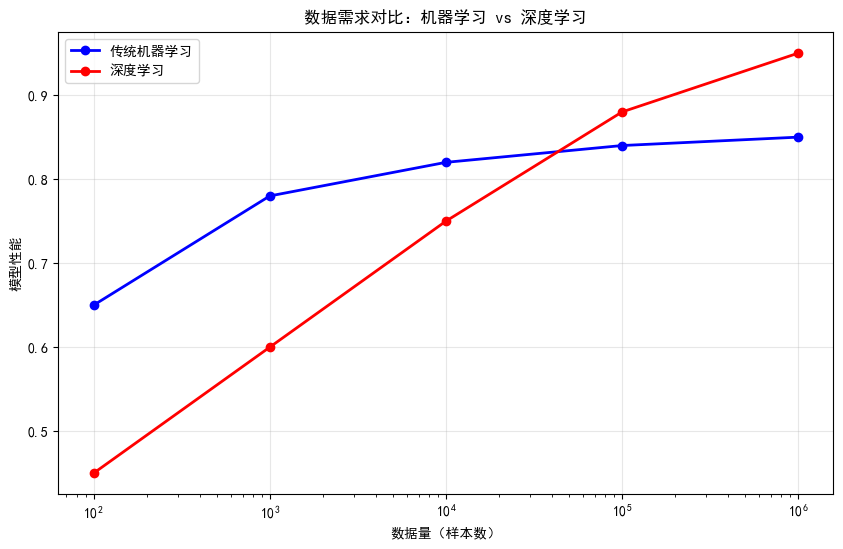

关键洞察:
• 小数据: 传统ML优势明显
• 大数据: DL性能更优
• DL需要大量数据才能发挥潜力


In [11]:
import matplotlib.pyplot as plt
import numpy as np

def data_requirements_comparison():
    """数据需求对比"""
    
    # 模拟不同数据量下的性能表现
    data_sizes = [100, 1000, 10000, 100000, 1000000]
    
    # 传统ML在小数据上表现好，大数据提升有限
    ml_performance = [0.65, 0.78, 0.82, 0.84, 0.85]
    
    # DL需要大量数据，但大数据下性能卓越
    dl_performance = [0.45, 0.60, 0.75, 0.88, 0.95]

    plt.rcParams['font.family'] = ['SimHei'] #字体样式
    plt.rcParams['font.sans-serif'] = ['SimHei'] #无衬线字体样式
    plt.rcParams['axes.unicode_minus'] = False #正常显示负号

    plt.figure(figsize=(10, 6))
    plt.plot(data_sizes, ml_performance, 'bo-', linewidth=2, label='传统机器学习')
    plt.plot(data_sizes, dl_performance, 'ro-', linewidth=2, label='深度学习')
    plt.xscale('log')
    plt.xlabel('数据量（样本数）')
    plt.ylabel('模型性能')
    plt.title('数据需求对比：机器学习 vs 深度学习')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print("关键洞察:")
    print("• 小数据: 传统ML优势明显")
    print("• 大数据: DL性能更优")
    print("• DL需要大量数据才能发挥潜力")

data_requirements_comparison()

In [12]:
def computational_requirements():
    """计算资源需求对比"""
    
    requirements = {
        "硬件需求": {
            "机器学习": "CPU即可，内存要求中等",
            "深度学习": "需要GPU，大量显存，高性能计算"
        },
        "训练时间": {
            "机器学习": "分钟到小时级别",
            "深度学习": "小时到天级别，甚至更久"
        },
        "推理速度": {
            "机器学习": "通常很快",
            "深度学习": "可能较慢，需要优化"
        },
        "能耗": {
            "机器学习": "相对较低",
            "深度学习": "非常高"
        }
    }
    
    print("=== 计算资源需求对比 ===\n")
    for aspect, info in requirements.items():
        print(f"{aspect}:")
        print(f"  机器学习: {info['机器学习']}")
        print(f"  深度学习: {info['深度学习']}\n")

computational_requirements()

=== 计算资源需求对比 ===

硬件需求:
  机器学习: CPU即可，内存要求中等
  深度学习: 需要GPU，大量显存，高性能计算

训练时间:
  机器学习: 分钟到小时级别
  深度学习: 小时到天级别，甚至更久

推理速度:
  机器学习: 通常很快
  深度学习: 可能较慢，需要优化

能耗:
  机器学习: 相对较低
  深度学习: 非常高



In [13]:
def performance_by_task():
    """不同任务上的性能表现"""
    
    tasks_performance = {
        "结构化数据预测": {
            "机器学习": "优秀（特别是树模型）",
            "深度学习": "良好，但可能过度复杂",
            "推荐": "优先选择机器学习"
        },
        "图像分类": {
            "机器学习": "需要复杂特征工程，性能有限",
            "深度学习": "卓越（CNN系列）", 
            "推荐": "优先选择深度学习"
        },
        "自然语言处理": {
            "机器学习": "基于TF-IDF等方法，性能尚可",
            "深度学习": "卓越（Transformer系列）",
            "推荐": "优先选择深度学习"
        },
        "时间序列预测": {
            "机器学习": "优秀（ARIMA、Prophet等）",
            "深度学习": "优秀（LSTM、Transformer）",
            "推荐": "根据数据量选择"
        }
    }
    
    print("=== 不同任务性能对比 ===\n")
    for task, info in tasks_performance.items():
        print(f"{task}:")
        print(f"  机器学习: {info['机器学习']}")
        print(f"  深度学习: {info['深度学习']}")
        print(f"  推荐: {info['推荐']}\n")

performance_by_task()

=== 不同任务性能对比 ===

结构化数据预测:
  机器学习: 优秀（特别是树模型）
  深度学习: 良好，但可能过度复杂
  推荐: 优先选择机器学习

图像分类:
  机器学习: 需要复杂特征工程，性能有限
  深度学习: 卓越（CNN系列）
  推荐: 优先选择深度学习

自然语言处理:
  机器学习: 基于TF-IDF等方法，性能尚可
  深度学习: 卓越（Transformer系列）
  推荐: 优先选择深度学习

时间序列预测:
  机器学习: 优秀（ARIMA、Prophet等）
  深度学习: 优秀（LSTM、Transformer）
  推荐: 根据数据量选择



In [14]:
def interpretability_comparison():
    """可解释性对比"""
    
    def ml_interpretability():
        """机器学习的可解释性"""
        print("机器学习可解释性:")
        print("  • 决策树: 可可视化决策路径")
        print("  • 线性模型: 系数可解释")
        print("  • 特征重要性: 可排名特征影响")
        print("  • 适合需要解释的领域: 金融、医疗等")
    
    def dl_interpretability():
        """深度学习的可解释性"""
        print("\n深度学习可解释性:")
        print("  • 黑盒问题: 难以理解内部决策")
        print("  • 解释工具: LIME、SHAP、注意力可视化")
        print("  • 层次特征: 可可视化学习到的特征")
        print("  • 研究热点: 可解释AI(XAI)")
    
    ml_interpretability()
    dl_interpretability()

interpretability_comparison()

机器学习可解释性:
  • 决策树: 可可视化决策路径
  • 线性模型: 系数可解释
  • 特征重要性: 可排名特征影响
  • 适合需要解释的领域: 金融、医疗等

深度学习可解释性:
  • 黑盒问题: 难以理解内部决策
  • 解释工具: LIME、SHAP、注意力可视化
  • 层次特征: 可可视化学习到的特征
  • 研究热点: 可解释AI(XAI)


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def ml_spam_classification():
    """机器学习实现垃圾邮件分类"""
    
    # 示例数据
    emails = [
        "免费获得iPhone点击链接",  # 垃圾邮件
        "明天会议安排在301室",     # 正常邮件
        "赢取百万大奖立即参与",     # 垃圾邮件
        "项目进度报告请查收",       # 正常邮件
        "限时优惠不要错过",        # 垃圾邮件
        "周末团建活动通知"         # 正常邮件
    ]
    labels = [1, 0, 1, 0, 1, 0]  # 1:垃圾邮件, 0:正常邮件
    
    # 特征工程
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(emails)
    
    # 分割数据
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)
    
    # 训练模型
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # 预测和评估
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"机器学习准确率: {accuracy:.3f}")
    print(f"特征重要性: {model.feature_importances_[:5]}")  # 可解释性

ml_spam_classification()

机器学习准确率: 0.500
特征重要性: [0.         0.26342072 0.         0.19350811 0.32022472]


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def dl_sentiment_analysis():
    """深度学习实现情感分析"""
    
    # 示例数据
    texts = [
        "这部电影真的很精彩",
        "演技太差了看不下去", 
        "剧情扣人心弦很棒",
        "浪费时间不值得看",
        "导演功力深厚佩服",
        "特效粗糙故事老套"
    ]
    labels = [1, 0, 1, 0, 1, 0]  # 1:正面, 0:负面
    
    # 文本预处理
    tokenizer = Tokenizer(num_words=1000)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    X = pad_sequences(sequences, maxlen=10)
    
    # 构建深度学习模型
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(1000, 16, input_length=10),  # 自动学习词嵌入
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    # 训练模型
    history = model.fit(X, labels, epochs=50, verbose=0)
    
    # 评估
    loss, accuracy = model.evaluate(X, labels, verbose=0)
    print(f"深度学习准确率: {accuracy:.3f}")
    print("自动学习文本表示，无需手动特征工程!")

dl_sentiment_analysis()

ValueError: Unrecognized data type: x=[[0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 0 0 4]
 [0 0 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 6]] (of type <class 'numpy.ndarray'>)

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def dl_sentiment_analysis():
    """深度学习实现情感分析"""
    
    # 示例数据
    texts = [
        "这部电影真的很精彩",
        "演技太差了看不下去", 
        "剧情扣人心弦很棒",
        "浪费时间不值得看",
        "导演功力深厚佩服",
        "特效粗糙故事老套"
    ]
    labels = [1, 0, 1, 0, 1, 0]  # 1:正面, 0:负面
    
    # 文本预处理
    tokenizer = Tokenizer(num_words=1000)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    X = pad_sequences(sequences, maxlen=10)
    
    # 构建深度学习模型
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(1000, 16, input_length=10),  # 自动学习词嵌入
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    # 训练模型
    history = model.fit(X, labels, epochs=50, verbose=0)
    
    # 评估
    loss, accuracy = model.evaluate(X, labels, verbose=0)
    print(f"深度学习准确率: {accuracy:.3f}")
    print("自动学习文本表示，无需手动特征工程!")

dl_sentiment_analysis()

ValueError: Unrecognized data type: x=[[0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 0 0 4]
 [0 0 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 6]] (of type <class 'numpy.ndarray'>)

In [19]:
def when_choose_ml():
    """选择机器学习的情况"""
    
    scenarios = [
        "数据量较小（几千到几万样本）",
        "结构化数据（表格数据）",
        "需要模型可解释性",
        "计算资源有限",
        "快速原型开发",
        "传统预测任务（销量预测、分类等）"
    ]
    
    print("=== 选择机器学习当 ===\n")
    for scenario in scenarios:
        print(f"• {scenario}")

when_choose_ml()

=== 选择机器学习当 ===

• 数据量较小（几千到几万样本）
• 结构化数据（表格数据）
• 需要模型可解释性
• 计算资源有限
• 快速原型开发
• 传统预测任务（销量预测、分类等）


In [20]:
def when_choose_dl():
    """选择深度学习的情况"""
    
    scenarios = [
        "大数据量（数十万以上样本）",
        "非结构化数据（图像、文本、语音）",
        "需要自动特征学习",
        "复杂模式识别任务",
        "有充足计算资源（GPU）",
        "追求最先进的性能"
    ]
    
    print("\n=== 选择深度学习当 ===\n")
    for scenario in scenarios:
        print(f"• {scenario}")

when_choose_dl()


=== 选择深度学习当 ===

• 大数据量（数十万以上样本）
• 非结构化数据（图像、文本、语音）
• 需要自动特征学习
• 复杂模式识别任务
• 有充足计算资源（GPU）
• 追求最先进的性能


In [21]:
def hybrid_approaches():
    """机器学习和深度学习的融合策略"""
    
    strategies = {
        "特征提取+机器学习": {
            "方法": "使用深度学习提取特征，然后用传统ML分类",
            "例子": "CNN特征 + SVM分类器",
            "优势": "结合DL的特征能力和ML的可解释性"
        },
        "集成方法": {
            "方法": "将ML和DL模型集成",
            "例子": "随机森林 + 神经网络的投票集成", 
            "优势": "提升鲁棒性和性能"
        },
        "迁移学习": {
            "方法": "预训练DL模型 + 微调ML模型",
            "例子": "BERT特征 + 逻辑回归",
            "优势": "利用预训练知识，适应小数据"
        }
    }
    
    print("=== 融合使用策略 ===\n")
    for strategy, info in strategies.items():
        print(f"{strategy}:")
        print(f"  方法: {info['方法']}")
        print(f"  例子: {info['例子']}")
        print(f"  优势: {info['优势']}\n")

hybrid_approaches()

=== 融合使用策略 ===

特征提取+机器学习:
  方法: 使用深度学习提取特征，然后用传统ML分类
  例子: CNN特征 + SVM分类器
  优势: 结合DL的特征能力和ML的可解释性

集成方法:
  方法: 将ML和DL模型集成
  例子: 随机森林 + 神经网络的投票集成
  优势: 提升鲁棒性和性能

迁移学习:
  方法: 预训练DL模型 + 微调ML模型
  例子: BERT特征 + 逻辑回归
  优势: 利用预训练知识，适应小数据



In [22]:
def summary_table():
    """总结对比表"""
    
    comparison = {
        "特征工程": {
            "机器学习": "需要大量人工特征工程",
            "深度学习": "自动特征学习"
        },
        "数据需求": {
            "机器学习": "小数据即可工作",
            "深度学习": "需要大量数据"
        },
        "计算资源": {
            "机器学习": "CPU，资源需求低", 
            "深度学习": "GPU，资源需求高"
        },
        "可解释性": {
            "机器学习": "高",
            "深度学习": "低（黑盒）"
        },
        "适用数据": {
            "机器学习": "结构化数据",
            "深度学习": "非结构化数据"
        },
        "性能天花板": {
            "机器学习": "相对较低",
            "深度学习": "很高"
        }
    }
    
    print("=== 机器学习和深度学习对比总结 ===\n")
    print(f"{'特性':<15} {'机器学习':<20} {'深度学习':<20}")
    print("-" * 55)
    
    for aspect, info in comparison.items():
        print(f"{aspect:<15} {info['机器学习']:<20} {info['深度学习']:<20}")

summary_table()

=== 机器学习和深度学习对比总结 ===

特性              机器学习                 深度学习                
-------------------------------------------------------
特征工程            需要大量人工特征工程           自动特征学习              
数据需求            小数据即可工作              需要大量数据              
计算资源            CPU，资源需求低            GPU，资源需求高           
可解释性            高                    低（黑盒）               
适用数据            结构化数据                非结构化数据              
性能天花板           相对较低                 很高                  


In [1]:
# 诊断脚本：确定环境中 model_to_dot 的正确位置
import importlib

possible_sources = [
    'tesnsorflow.keras.utils',
    'keras.utils',
    'keras.utils.vis_utils'
]

for source in possible_sources:
    try:
        module = importlib.import_module(source)
        if 'model_to_dot' in dir(module):
            print(f'Find "model_to_dot" in "{source}"')
            break
    except ModuleNotFoundError:
        print(f'Module not exist: {source}')

Module not exist: tesnsorflow.keras.utils


2025-12-19 16:54:44.741730: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Find "model_to_dot" in "keras.utils"
